## Machine learning 1 & Introduction to Machine Learning and Data Mining
# Homework 3: Language bias of decision trees

1. Generate two synthetic datasets to study the behavior of decision trees.
- Attributes A, B and C should have random values between 0 and 1
- There should be 10.000 examples in the test set and 300 in the training set
- Target variable „A>B“, should have value „true“ if A>B, else “false”

2. Visualize the test data: Scatterplot with _A_ and _B_ on the axes, the color should be _"A>B"_

3. Plot also the training set in (a separate) Scatterplot

4. Fit a decision tree
- Fit and evaluate a decision tree
- Visualize the predicted values in a scatterplot

5. How does the training set size influence the model performance?
- Make a for-loop of different training sizes from 5 to 300 examples
- Make a plot with training set size on the X-axis and classification accuracy on the Y-axis

6. Write a paragraph about your findings. Try to address "why" the resuls are as they are. 

_Hints_: 
- Use ```numpy.random.rand(num_examples)``` to get a vector of random numbers from module ```numpy```.
- Use ```plt.scatter``` from ```import matplotlib.pyplot as plt``` for the visualizations





In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [15]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
#You can use this function to generate random data for the homework.

def generate_data(num_examples):
    """ Generate random data with columns A, B and C and target A>B. """
    A = np.random.rand(num_examples)
    B = np.random.rand(num_examples)
    C = np.random.rand(num_examples)
    target = A > B

    # Create a dataframe
    df = pd.DataFrame({'A': A, 'B': B, 'C': C, 'A>B': target})
    return df

#Assign the generated data to dataframes, no need for a pd.DataFrame because the function already returns a df
train_df = generate_data(300)
test_df = generate_data(10000)


In [17]:
train_df

A         B         C    A>B
0    0.285571  0.531940  0.951210  False
1    0.230989  0.838435  0.058229  False
2    0.910202  0.252704  0.033162   True
3    0.688771  0.946948  0.668679  False
4    0.926706  0.051536  0.856184   True
..        ...       ...       ...    ...
295  0.119890  0.130109  0.616509  False
296  0.145526  0.554873  0.892449  False
297  0.669376  0.415056  0.050308   True
298  0.365094  0.872085  0.424392  False
299  0.628522  0.008575  0.581941   True

[300 rows x 4 columns]

In [18]:
test_df

A         B         C    A>B
0     0.962499  0.670250  0.521969   True
1     0.397412  0.914549  0.496030  False
2     0.235026  0.723901  0.735742  False
3     0.553814  0.643167  0.250462  False
4     0.838654  0.971405  0.839650  False
...        ...       ...       ...    ...
9995  0.399333  0.445388  0.318590  False
9996  0.967780  0.291377  0.678541   True
9997  0.996952  0.155363  0.976539   True
9998  0.051189  0.049609  0.795682   True
9999  0.970924  0.649566  0.333485   True

[10000 rows x 4 columns]

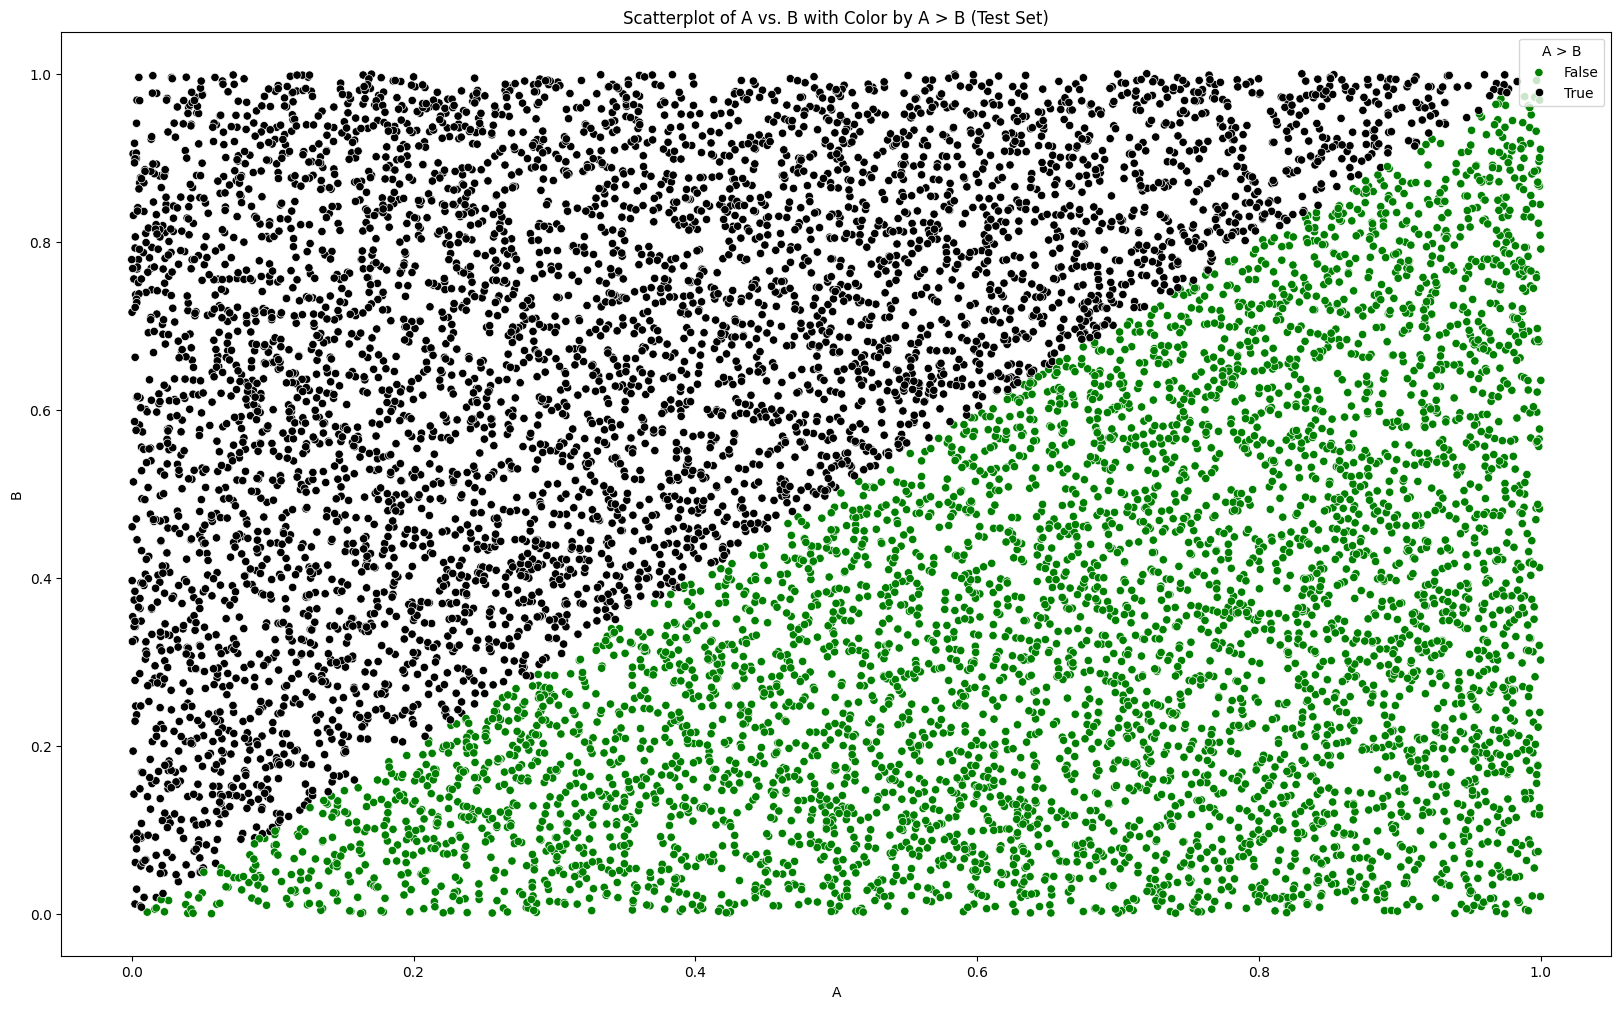

In [19]:
# Create a scatterplot of test_df
plt.figure(figsize=(20, 12))
sns.scatterplot(data=test_df, x='A', y='B', hue='A>B', palette=['black', 'green'])

# Add labels and a legend
plt.xlabel('A')
plt.ylabel('B')
plt.legend(title='A > B', labels=['False', 'True'])

# Show the plot
plt.title('Scatterplot of A vs. B with Color by A > B (Test Set)')
plt.show()


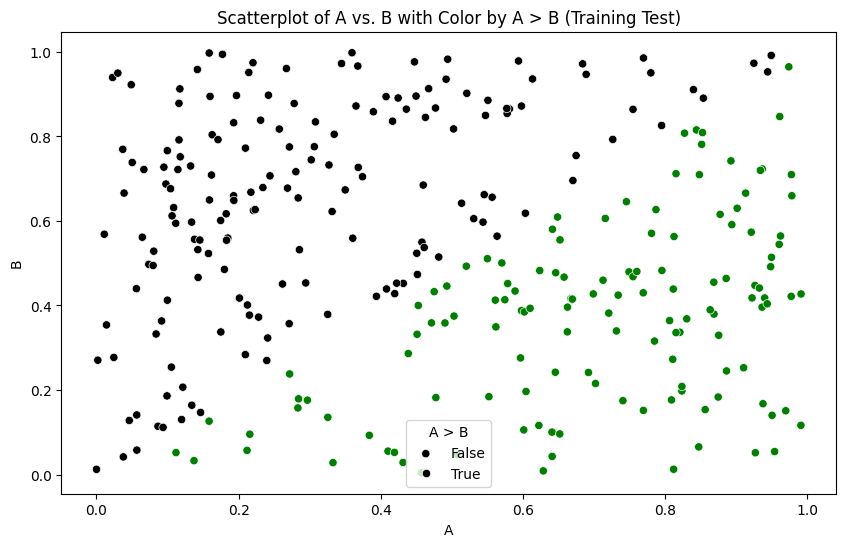

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='A', y='B', hue='A>B', palette=['black', 'green'])

# Add labels and a legend
plt.xlabel('A')
plt.ylabel('B')
plt.legend(title='A > B', labels=['False', 'True'])

# Show the plot for the Training Test
plt.title('Scatterplot of A vs. B with Color by A > B (Training Test)')
plt.show()


# Using a sub plot will show the graphs better 

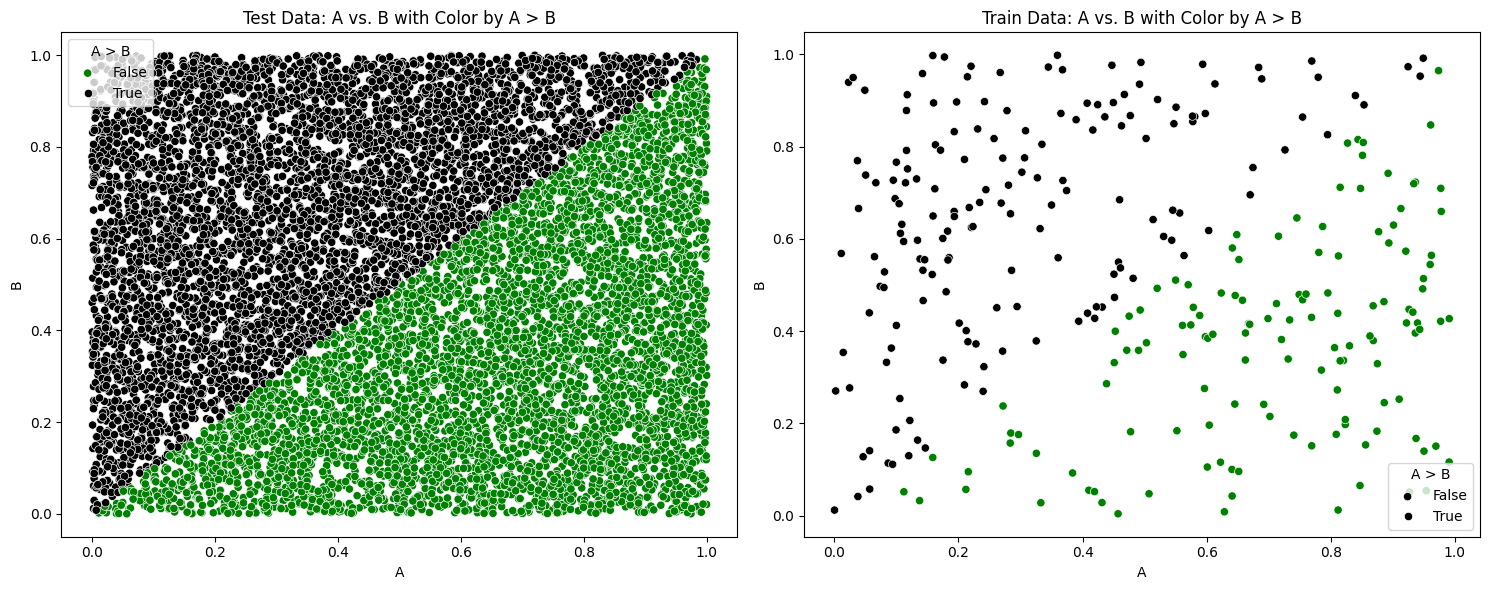

In [21]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatterplot of the test dataset
sns.scatterplot(data=test_df, x='A', y='B', hue='A>B', palette=['black', 'green'], ax=axes[0])
axes[0].set_xlabel('A')
axes[0].set_ylabel('B')
axes[0].set_title('Test Data: A vs. B with Color by A > B')
axes[0].legend(title='A > B', labels=['False', 'True'])

# Scatterplot of the train dataset
sns.scatterplot(data=train_df, x='A', y='B', hue='A>B', palette=['black', 'green'], ax=axes[1])
axes[1].set_xlabel('A')
axes[1].set_ylabel('B')
axes[1].set_title('Train Data: A vs. B with Color by A > B')
axes[1].legend(title='A > B', labels=['False', 'True'])

# Adjust layout for subplots
plt.tight_layout()

# Show the subplots
plt.show()

# Decision Tree Fitting and Visualization

In [22]:
# Separate features (X) and target (y) variables for the train data
x_train = train_df[['A', 'B', 'C']]
y_train = train_df['A>B']

# Separate features (X) and target (y) variables for the test data
x_test = test_df[['A', 'B', 'C']]
y_test = test_df['A>B']

In [23]:
# Fit a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Predict on the test data
y_pred = clf.predict(x_test)

In [25]:
# Evaluate the model
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

Accuracy of the Decision Tree Classifier: 0.95


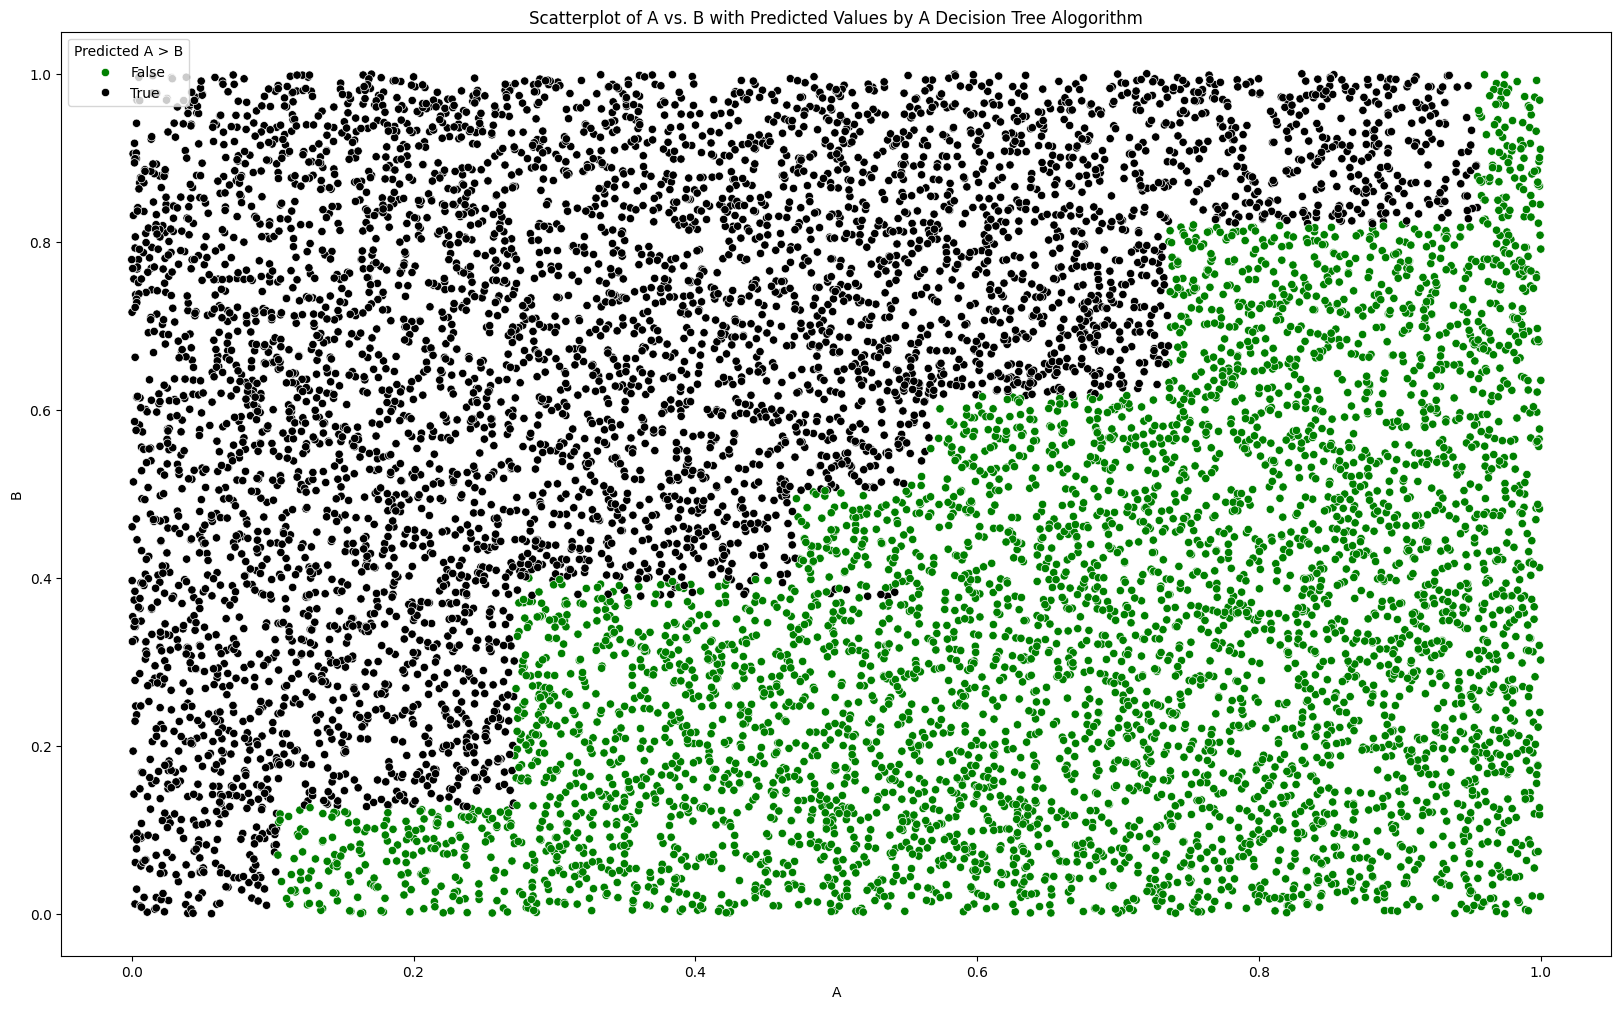

In [26]:
# Visualize predicted values in a scatterplot
plt.figure(figsize=(20, 12))
sns.scatterplot(data=test_df, x='A', y='B', hue=y_pred, palette=['black', 'green'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatterplot of A vs. B with Predicted Values by A Decision Tree Alogorithm')
plt.legend(title='Predicted A > B', labels=['False', 'True'])
plt.show()

In [27]:
# Initialize arrays to store training sizes and corresponding accuracies
training_sizes = list(range(5, 301, 10))  # Different training set sizes from 5 to 300
accuracies = []

In [31]:
for size in training_sizes:
    
    # Select the first 'size' examples from train_df
    train_data = train_df.iloc[:size]
    
    # Prepare input features and target variable
    X_train = train_data[['A', 'B', 'C']]
    y_train = train_data['A>B']
   
    
    # Create and fit the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Generate predictions on the test data
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy and store it
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)




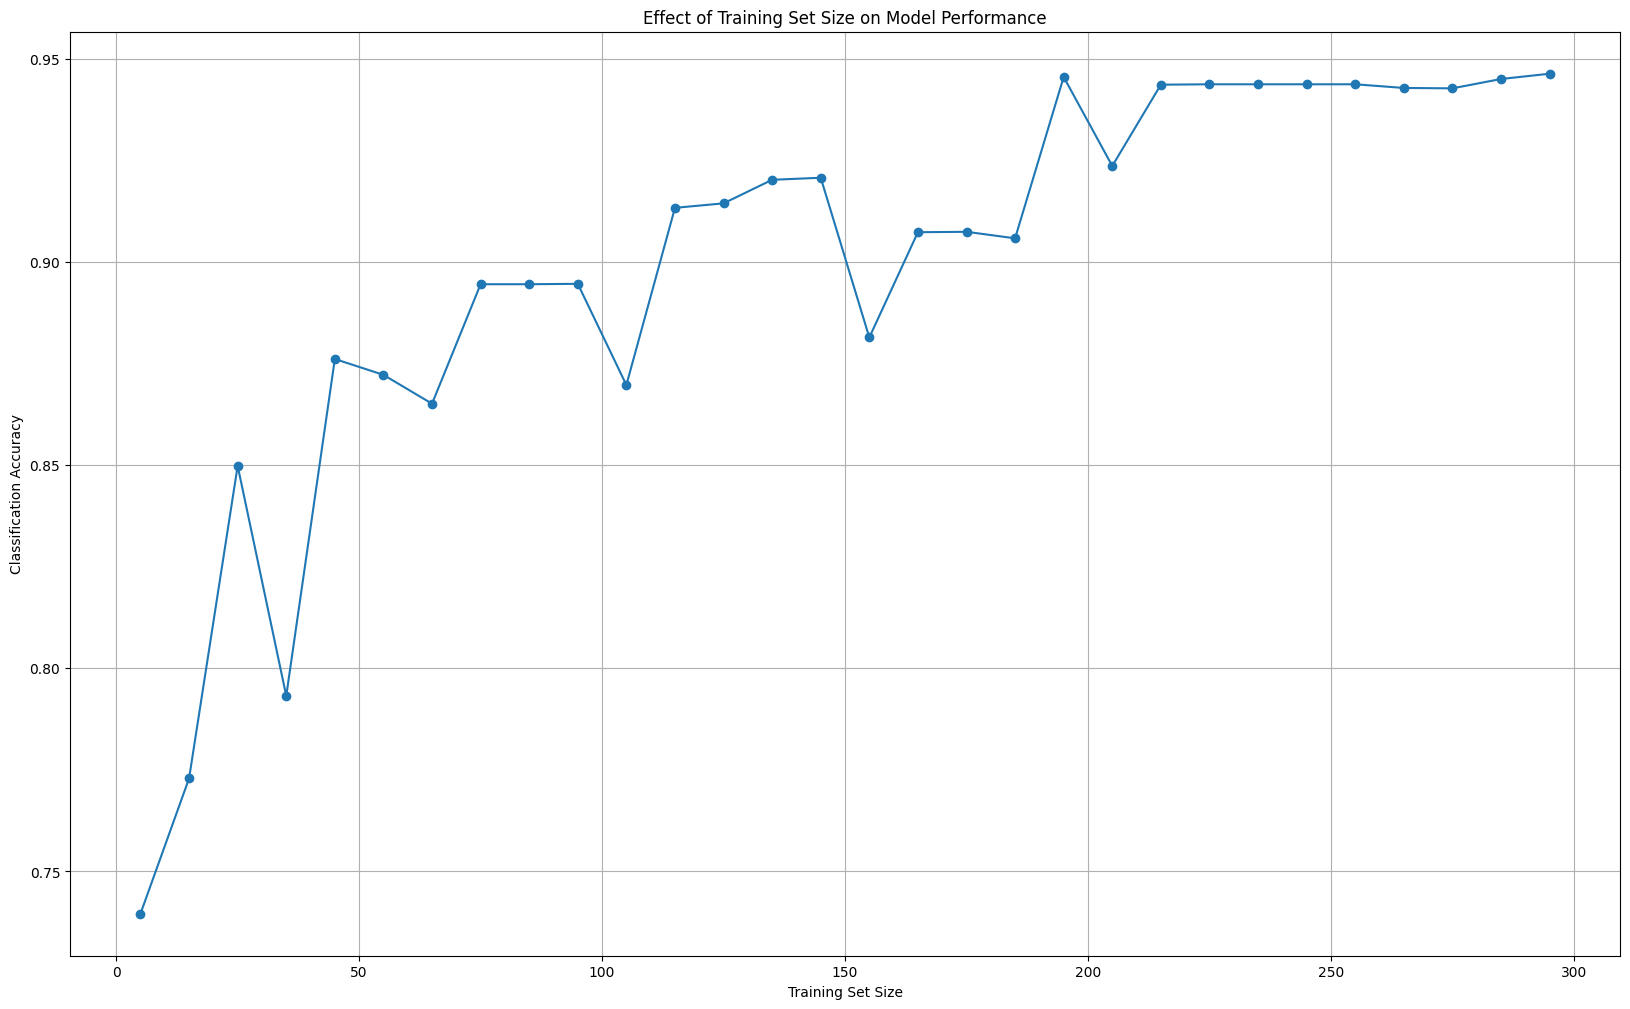

In [30]:
# Plot the results
plt.figure(figsize=(20, 12))
plt.plot(training_sizes, accuracies, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Classification Accuracy')
plt.title('Effect of Training Set Size on Model Performance')
plt.grid(True)
plt.show()

The training set is small,therefore the model's perfomance is influenced a lot and we can see it from the first points as they jump between really high to low accuracy. However, we capped the accuracy at 0.95, so at some point the largeness won't matter as much.
